## Stack plots

* Stack plots are used to visualize the contributions of different processes in a single histogram.
* Each histogram corresponds to a specific process, and they are stacked on top of each other to create a cumulative distribution.
* The height of the stack at each bin represents the sum of the contributions from all histograms up to that bin.

* The equation for stack plots can be represented as:
stack_i(x) = sum(histogram_j(x)) from j=1 to i

In [1]:
import ROOT
import time

Welcome to JupyROOT 6.28/00


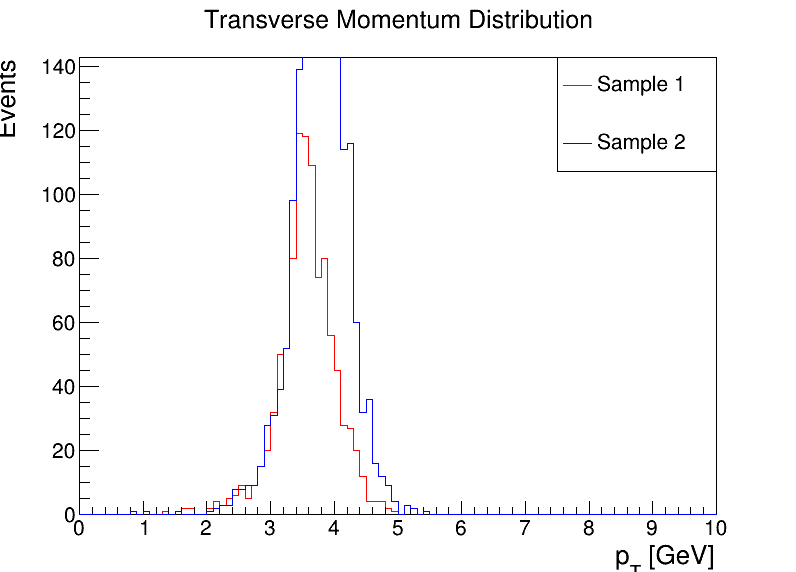

In [2]:
# Open the first ROOT file and access the TTree object
file1 = ROOT.TFile("pyROOT_exercise1.root", "READ")
tree1 = file1.Get("tree")

# Open the second ROOT file and access the TTree object
file2 = ROOT.TFile("pyROOT_exercise1_2.root", "READ")
tree2 = file2.Get("tree")

# Create histograms for the transverse momentum distribution
histogram1 = ROOT.TH1F("pt_distribution_1", "Transverse Momentum Distribution", 100, 0, 10)
histogram2 = ROOT.TH1F("pt_distribution_2", "Transverse Momentum Distribution", 100, 0, 10)

# Fill the histograms with the pt values
for event in tree1:
    px = event.px
    py = event.py
    pt = [(x**2 + y**2)**0.5 for x, y in zip(px, py)]
    sorted_pt = sorted(pt, reverse=True)
    histogram1.Fill(sorted_pt[0])

for event in tree2:
    px = event.px
    py = event.py
    pt = [(x**2 + y**2)**0.5 for x, y in zip(px, py)]
    sorted_pt = sorted(pt, reverse=True)
    histogram2.Fill(sorted_pt[0])

histogram1.SetStats(0)
# Set the histogram styles and colors
histogram1.SetLineColor(ROOT.kRed)
histogram2.SetLineColor(ROOT.kBlue)


#histogram1.GetXaxis().SetRangeUser(1, 6)
histogram1.GetYaxis().SetRangeUser(0, 1.2 * histogram1.GetMaximum())

# Set axis titles and labels
histogram1.GetXaxis().SetTitle("p_{T} [GeV]")
histogram1.GetYaxis().SetTitle("Events")
histogram1.GetXaxis().SetLabelSize(0.04)
histogram1.GetYaxis().SetLabelSize(0.04)
histogram1.GetXaxis().SetTitleSize(0.05)
histogram1.GetYaxis().SetTitleSize(0.05)

# Set legend
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(histogram1, "Sample 1", "l")
legend.AddEntry(histogram2, "Sample 2", "l")
legend.SetTextSize(0.04)


# Create a canvas and draw the stack histogram
canvas = ROOT.TCanvas("canvas", "Stacked Transverse Momentum Distribution", 800, 600)
histogram1.Draw()
histogram2.Draw("SAME")
legend.Draw()

# Set the y-axis to logarithmic scale
#ROOT.gPad.SetLogy(True)

canvas.Draw()


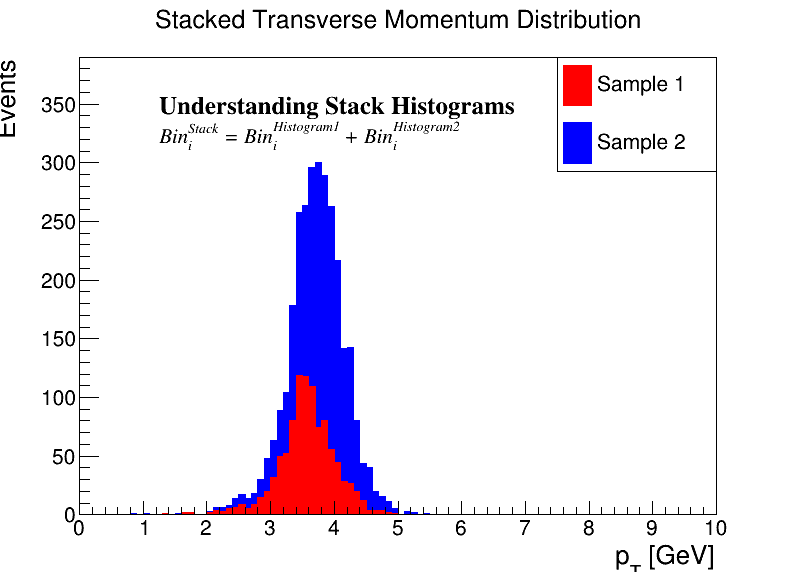

In [3]:
# Set the histogram styles and colors
histogram1.SetFillColor(ROOT.kRed)
histogram2.SetFillColor(ROOT.kBlue)

# Create a stack histogram
stack = ROOT.THStack("pt_stack", "Stacked Transverse Momentum Distribution")
stack.Add(histogram1)
stack.Add(histogram2)

stack.Draw("HIST")

# Set axis titles and labels
stack.GetXaxis().SetTitle("p_{T} [GeV]")
stack.GetYaxis().SetTitle("Events")
stack.GetXaxis().SetLabelSize(0.04)
stack.GetYaxis().SetLabelSize(0.04)
stack.GetXaxis().SetTitleSize(0.05)
stack.GetYaxis().SetTitleSize(0.05)

# Set legend
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(histogram1, "Sample 1", "f")
legend.AddEntry(histogram2, "Sample 2", "f")
legend.SetTextSize(0.04)
legend.Draw()

# Add LaTeX formatted additional text
latex_text = ROOT.TLatex()
latex_text.SetNDC()
latex_text.SetTextFont(42)
latex_text.SetTextSize(0.04)
latex_text.DrawLatex(0.2, 0.8, "#scale[1.2]{#font[22]{Understanding Stack Histograms}}")
latex_text.DrawLatex(0.2, 0.75, "#font[12]{Bin_{i}^{Stack} = Bin_{i}^{Histogram1} + Bin_{i}^{Histogram2}}")


# Set plot range
stack.SetMinimum(0)
stack.SetMaximum(1.3 * stack.GetMaximum())


# Update the canvas and save the plot
canvas.Update()
#canvas.SaveAs("pt_stack.png")

canvas.Draw()


In [4]:
# Close the ROOT files
file1.Close()
file2.Close()